## **Gradient Descent Implementation**

Gradient Descent Implementation. Consider the function f(x) = x
4 + 4x
3 − 7x
2 − 10x.
1. Write down the expression of the gradient of f.
2. Plot the function in 2D.
3. Write a python code that gets as input i) an initial point x
0
, iii) learning rate ρ; iii) the
threshold ; iv) the maximum number of iterations of the gradient descent Nmax; and runs
the gradient descent algorithm starting from the initial point until convergence or until the
maximum number of iterations is achieved. The output of the code must be the sequence
of points (starting from initial point and ending with the last point) obtained by the gradient
descent. In all the following, set  = 0.001 and Nmax = 10, 000.
4. Let x
0 = 2 and ρ = 1/20. Plot the sequence of obtained points. Does GD converge? If so,
after how many iterations?
5. Repeat the previous part with x
0 = 2 and ρ = 1/14.
6. Repeat the previous part with x
0 = −6 and ρ = 1/100.
7. Repeat the previous part with x
0 = 2 and ρ = 1/3.
8. Write down your conclusion about the effect of the learning rate and the initial point

# Input Section To Take input from user

In [5]:
initial_X = float(input("Please Enter Initial Point of x"))         # Initial guess for x
learning_rate = float(input("Please input the learning rate"))      # Speed of learning
threshold = float(input("Please input the threshold"))              # The value after which the gradient descent converges
N_max = int(input("Please input the Maximum Interation to run Gradient Descent")) # If it does not converge after N_max iterations we stop GD

Please Enter Initial Point of x2.4
Please input the learning rate0.5


0.5

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting Section

In [82]:
def plotGraph(x, y, gName, arrowV=False):
  '''
    gName : is to provide the name to graph drawn
    arrowV : If arrow between consecutive points are needed set it to True
  '''
  plt.plot(x, y, label="Line")
  plt.plot()
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title(gName)
  if arrowV:
    plt.quiver(x[:-1], y[:-1], np.array(x[1:])-np.array(x[:-1]), np.array(y[1:])-np.array(y[:-1]), scale_units='xy', angles='xy', scale=1)
  plt.legend()
  plt.show()


# Plotting point of function

[-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4]
[240, 0, -72, -60, -24, 0, 0, -12, 0, 96, 360]


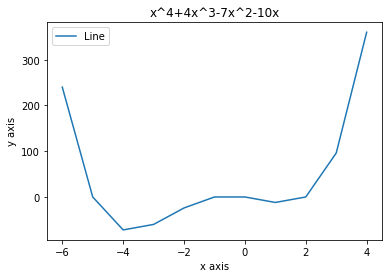

In [83]:
xPoints = []
xVals = []
for i in np.arange(-6,5,1):
  xPoints.append(i)
  xVals.append(funcVal(i))
plotGraph(xPoints, xVals, "x^4+4x^3-7x^2-10x")

# Function and Derivative

In [58]:
def funcVal(x):
  '''
    To generate f(x) at x
  '''
  return (x*x*x*x + 4*x*x*x - 7*x*x - 10*x)

In [59]:
def calFirstDer(x):
  '''
      To generate f'(x) at x
  '''
  return 4*x*x*x + 12*x*x - 14*x - 10

# Gradient Descent Algorithm

In [111]:
def gradDescent(initialValX, learnRate, thresh, maxIter):
  '''
    Gradient Descent Algorithm
  '''
  converges = False
  points = []       #Stores points tried
  vals = []         #Stores respective values
  der = []          #Stroes previous derivate at that point 
  points.append(initialValX)
  vals.append(funcVal(initialValX))
  for i in range(maxIter):
    firstDer = calFirstDer(initialValX)
    nextX = initialValX - learnRate * firstDer
    points.append(nextX)
    vals.append(funcVal(nextX))
    der.append(firstDer)
    if abs(firstDer) <= thresh:                           #If abs(firstDerivate with previous point becomes less than threshold
      print("Converged after {0} steps".format(i+1))
      converges = True
      break
    initialValX = nextX
  return converges, points, vals

# Value Calls

In [118]:
def checkPlot(conv, points, vals, strVal):
  if conv:
    plotGraph(vals,points, strVal, True)
  else:
    print("Did not Converge after max Iterations")

Converged after 45 steps
[0, 0.9261000000000008, -3.830391290488188, -11.846282626100376, -12.895236575016106, -12.939391758396578, -13.077982419995378, -13.103729505254295, -13.146367569862635, -13.15937672578702, -13.174728039086798, -13.180919553774451, -13.18685852166896, -13.189702844182369, -13.192092692854468, -13.193369614097747, -13.194354045502271, -13.194918584376397, -13.19533001104297, -13.195577060022622, -13.195750595205457, -13.195857974217448, -13.195931602276616, -13.19597806449721, -13.196009423036912, -13.196029467271432, -13.196042856173886, -13.196051486533015, -13.196057212328336, -13.196060923486494, -13.196063374720541, -13.196064969215657, -13.19606601932173, -13.196066704015323, -13.196067154082575, -13.196067447990668, -13.196067640942903, -13.196067767074362, -13.196067849812572, -13.196067903933782, -13.196067939416537, -13.196067962636805, -13.19606797785505, -13.19606798781685, -13.196067994344174, -13.196067998617734]
[2, -0.10000000000000009, 0.3241999

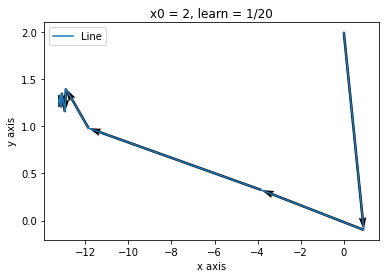

In [120]:
conv, points, vals = gradDescent(2, 1/20, 0.001, 10000)
checkPlot(conv, points, vals, "x0 = 2, learn = 1/20")


In [121]:
conv, points, vals  = gradDescent(2, 1/14, 0.001, 10000)
checkPlot(conv, points, vals, "x0 = 2, learn = 1/14")


Did not Converge after max Iterations


Converged after 15 steps
[240, -39.18733103999999, -53.03309835522545, -64.52693708341624, -71.08272471348431, -73.46098595857711, -74.01460169406303, -74.10711240873698, -74.11996671208577, -74.12161352247446, -74.12181801505858, -74.12184312235169, -74.12184619267461, -74.12184656761157, -74.12184661337503, -74.12184661895981]
[-6, -2.42, -2.79466848, -3.1500690460151706, -3.43151369692451, -3.6086777223730304, -3.6968310411686596, -3.7334560646258885, -3.747203122311591, -3.7521365200567964, -3.753876616572992, -3.754486545720146, -3.7546998611534232, -3.754774407634726, -3.7548004519984155, -3.754809550272513]


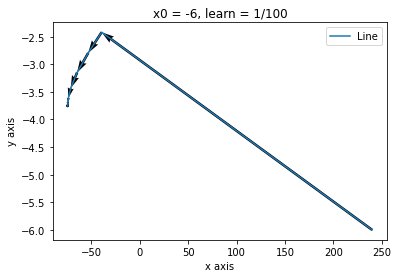

In [122]:
conv, points, vals  = gradDescent(-6, 1/100, 0.001, 10000)
checkPlot(conv, points, vals, "x0 = -6, learn = 1/100")


In [123]:
conv, points, vals  = gradDescent(2, 1/3, 0.001, 10000)
checkPlot(conv, points, vals, "x0 = 2, learn = 1/3")

Did not Converge after max Iterations
